In [16]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
import seaborn as sns # type: ignore
import math
# from scipy import stats
from tqdm import tqdm
from LogisticRegression import LogitRegression
import pickle

warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('penguins_preprocessed.csv')

In [18]:
# setting  X_train, y_train, X_test, y_test

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)

features = list(set(df.columns) - set(['gender']))

X = df[features].values
y = df['gender'].values

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices].astype(float)
y = y[indices].astype(float)

split_ratio = 0.8 
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(265, 13) (67, 13) (265,) (67,)


100%|██████████| 100000/100000 [00:03<00:00, 28547.18it/s]


Iteration 1: Accuracy:  0.791


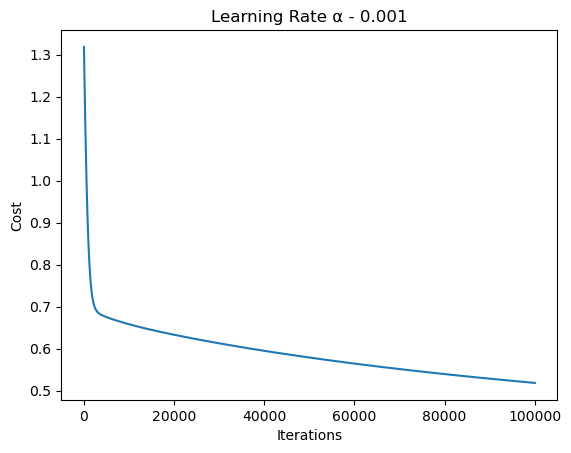

100%|██████████| 100000/100000 [00:03<00:00, 28251.27it/s]


Iteration 1: Accuracy:  0.8955


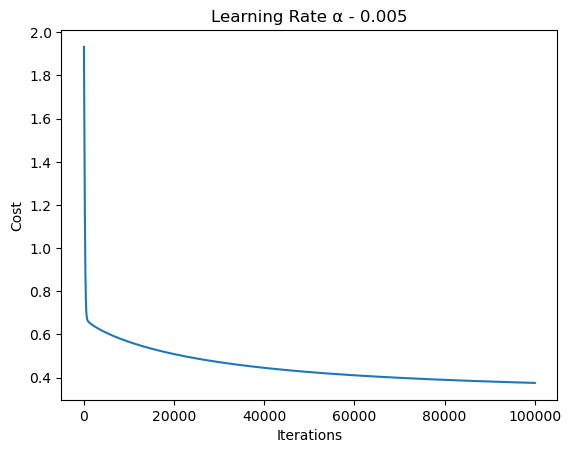

100%|██████████| 200000/200000 [00:07<00:00, 28556.22it/s]


Iteration 1: Accuracy:  0.8806


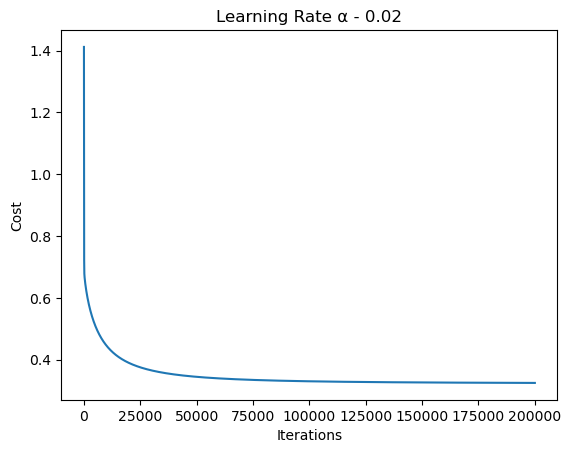

100%|██████████| 250000/250000 [00:08<00:00, 28606.02it/s]


Iteration 1: Accuracy:  0.8806


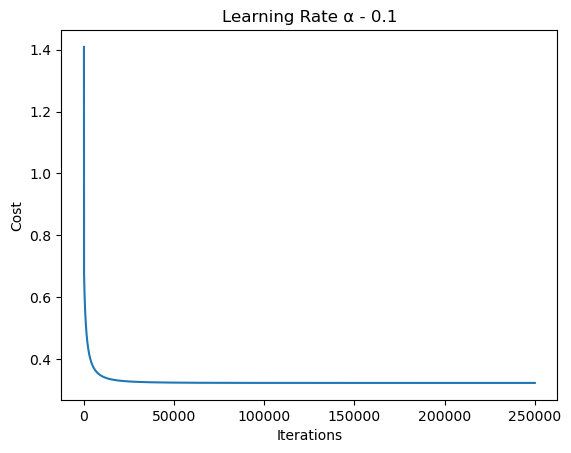

100%|██████████| 300000/300000 [00:10<00:00, 28498.10it/s]


Iteration 1: Accuracy:  0.8806


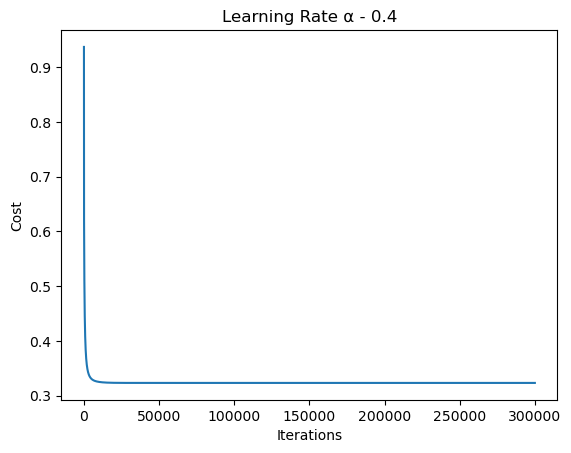

Best Accuracy:  {'learning_rate': 0.005, 'iterations': 100000, 'accuracy': 0.8955223880597015}


In [19]:
 # learning_rate , iterations
hyperparamters = [[0.001,100000],[0.005,100000],[0.02,200000],[0.1,250000],[0.4,300000]]
bestAccuracy = {"learning_rate":0.00,"iterations":0,"accuracy":0.00}
for i in hyperparamters:
    
    j = 1
    model = LogitRegression(learning_rate=i[0] ,iterations=i[1])
    loss = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print(f"Iteration {j}: Accuracy: ",round(accuracy,4))
    if accuracy > bestAccuracy["accuracy"]:
        bestAccuracy["accuracy"]=accuracy
        bestAccuracy["learning_rate"]=i[0]
        bestAccuracy["iterations"] = i[1]

    j+=1

    plt.plot(loss)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Learning Rate ⍺ - {i[0]}")
    plt.show()

print("Best Accuracy: ",bestAccuracy)

#### Saving to Pickle

In [20]:

model = LogitRegression(learning_rate=bestAccuracy["learning_rate"], iterations=bestAccuracy["iterations"])

with open('Nikhil_Gishnu_assignment1_part2.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
